<a href="https://colab.research.google.com/github/juancruz-py/elc_virtual_hackathon/blob/master/notebooks/ELC_hackaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este programa sirve para clasificar imagenes de mamografias




In [ ]:
#Importar librerias
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras  import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


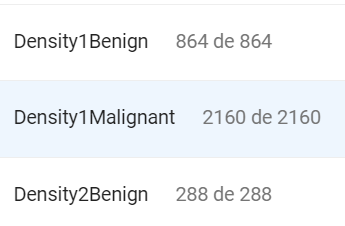

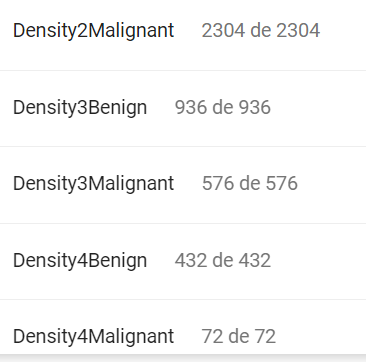

In [ ]:
from PIL import Image
import glob
#x_train_image_list = []
x_test_image_list = []
#y_train_image_list = []
y_test_image_list = []
dir_len = [864, 2160, 288, 2304, 936, 576, 432, 72]
dir_paths = [
'/content/drive/My Drive/Dataset/Density1Benign/',
'/content/drive/My Drive/Dataset/Density1Malignant/',
'/content/drive/My Drive/Dataset/Density2Benign/',
'/content/drive/My Drive/Dataset/Density2Malignant/',
'/content/drive/My Drive/Dataset/Density3Benign/',
'/content/drive/My Drive/Dataset/Density3Malignant/',
'/content/drive/My Drive/Dataset/Density4Benign/',
'/content/drive/My Drive/Dataset/Density4Malignant/'
]

x=list(zip(dir_len, dir_paths))
classif = 0
for tup in x:
  cont = 0
  classif += 1
  for filename in glob.glob( tup[1] + '*.png'):
    cont+=1
    if cont < tup[0]*.6:
      im=Image.open(filename)
      #x_train_image_list.append(im)
      #y_train_image_list.append(classif-1)
    if cont >= tup[0]*.60 and cont <= tup[0]*.65:
      im=Image.open(filename)
      x_test_image_list.append(im)
      y_test_image_list.append(classif-1)
      print(classif, cont)



In [ ]:
CATEGORIES = ['Density 1 Benign', 'Density 1 Malignant', 'Density 2 Benign', 'Density 2 Malignant',
              'Density 3 Benign', 'Density 3 Malignant','Density 4 Benign', 'Density 4 Malignant']

In [ ]:
from matplotlib import image
from numpy import asarray
lst=[]
lst_test=[]

for img in x_train_image_list:
  img = img.convert('RGB')
  rgb = np.array(img)
  lst.append(rgb)
x_train=np.array(lst)
print(type(x_train))
print(x_train.shape)

for img in x_test_image_list:
  img = img.convert('RGB')
  rgb = np.array(img)
  lst_test.append(rgb)
x_test=np.array(lst_test)
print(type(x_test))
print(x_test.shape) 
  



In [ ]:
y_train = y_train_image_list
y_train = np.array(y_train)
y_train = y_train.reshape(-1, 1)
print(y_train.shape)

y_test = y_test_image_list
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
print(y_test.shape)

In [ ]:
arr = np.arange(4575)
np.random.shuffle(arr)
print(arr)

x_train = [x_train[index] for index in arr]
x_train = np.array(x_train)
y_train = [y_train[index] for index in arr]
y_train = np.array(y_train)
img = plt.imshow(x_train[100])

print('The image label is:', y_train[0])
print('The image classification is:', CATEGORIES[y_train[0][0]])


In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
x_train = x_train / 255

In [ ]:
x_test = x_test / 255

In [ ]:
model = Sequential()

model.add( Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add( Conv2D(32, (5,5), activation='relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(500, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(250, activation='relu'))

model.add(Dense(8, activation='softmax'))


In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 32)      25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 89888)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              89889000  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)             

In [ ]:
hist = model.fit(x_train, y_train_one_hot,
                 batch_size=50,
                 epochs = 10)

Epoch 1/10
92/92 [==============================] - 542s 6s/step - loss: 1.9223 - accuracy: 0.2783
Epoch 2/10
92/92 [==============================] - 547s 6s/step - loss: 1.7266 - accuracy: 0.3178
Epoch 3/10
92/92 [==============================] - 542s 6s/step - loss: 1.5133 - accuracy: 0.4077
Epoch 4/10
92/92 [==============================] - 544s 6s/step - loss: 1.0181 - accuracy: 0.6190
Epoch 5/10
92/92 [==============================] - 547s 6s/step - loss: 0.5072 - accuracy: 0.8225
Epoch 6/10
92/92 [==============================] - 544s 6s/step - loss: 0.2408 - accuracy: 0.9183
Epoch 7/10
92/92 [==============================] - 540s 6s/step - loss: 0.1355 - accuracy: 0.9548
Epoch 8/10
92/92 [==============================] - 541s 6s/step - loss: 0.0923 - accuracy: 0.9690
Epoch 9/10
92/92 [==============================] - 543s 6s/step - loss: 0.0716 - accuracy: 0.9775
Epoch 10/10
92/92 [==============================] - 541s 6s/step - loss: 0.0570 - accuracy: 0.9814


In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]

12/12 [==============================] - 10s 830ms/step - loss: 656.8823 - accuracy: 0.4948


0.49476438760757446

In [ ]:
from google.colab import files
uploaded= files.upload() 


Saving 53587014 (17).png to 53587014 (17).png


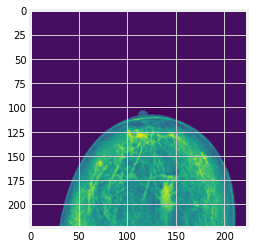

In [ ]:
new_image = plt.imread('53587014 (17).png')
img = plt.imshow(new_image)
from skimage.transform import resize
resized_image = resize(new_image, (224, 224, 3))

In [ ]:
predictions = model.predict(np.array([resized_image]))
predictions

array([[9.9999666e-01, 8.8690308e-09, 3.1841071e-10, 1.9884822e-06,
        3.4049929e-08, 9.7053874e-07, 1.4256234e-11, 4.1303471e-07]],
      dtype=float32)

In [ ]:
list_index = [0,1,2,3,4,5,6,7]
x = predictions

for i in range(8): 
  for j in range(8):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
for i in range(8):
  print(CATEGORIES[list_index[i]])
print(list_index)

Density 1 Benign
Density 2 Malignant
Density 3 Malignant
Density 4 Malignant
Density 3 Benign
Density 1 Malignant
Density 2 Benign
Density 4 Benign
[0, 3, 5, 7, 4, 1, 2, 6]
